# Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons. We have organized the current notebook into the following sections: 

- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


Analyze A/B Test Results
A/B tests are very commonly performed by data analysts and data scientists. It is important that you get some practice working with the difficulties of these.

For this project, you will be working to understand the results of an A/B test run by an e-commerce website. The company has developed a new web page in order to try and increase the number of users who "convert," meaning the number of users who decide to pay for the company's product. Your goal is to work through this notebook to help the company understand if they should implement this new page, keep the old page, or perhaps run the experiment longer to make their decision.


<a id='intro'></a>
## Introduction

A/B tests are very commonly performed by data analysts and data scientists. For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should:
- Implement the new webpage, 
- Keep the old webpage, or 
- Perhaps run the experiment longer to make their decision.

Each **ToDo** task below has an associated quiz present in the classroom.  Though the classroom quizzes are **not necessary** to complete the project, they help ensure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the [rubric](https://review.udacity.com/#!/rubrics/1214/view) specification. 

<a id='probability'></a>
## Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

### 1.1
Now, read in the `ab_data.csv` data. Store it in `df`. Below is the description of the data, there are a total of 5 columns:

<center>

|Data columns|Purpose|Valid values|
| ------------- |:-------------| -----:|
|user_id|Unique ID|Int64 values|
|timestamp|Time stamp when the user visited the webpage|-|
|group|In the current A/B experiment, the users are categorized into two broad groups. <br>The `control` group users are expected to be served with `old_page`; and `treatment` group users are matched with the `new_page`. <br>However, **some inaccurate rows** are present in the initial data, such as a `control` group user is matched with a `new_page`. |`['control', 'treatment']`|
|landing_page|It denotes whether the user visited the old or new webpage.|`['old_page', 'new_page']`|
|converted|It denotes whether the user decided to pay for the company's product. Here, `1` means yes, the user bought the product.|`[0, 1]`|
</center>
Use your dataframe to answer the questions in Quiz 1 of the classroom.

**a.** Read in the dataset from the `ab_data.csv` file and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head(3)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0


**b.** Use the cell below to find the number of rows in the dataset.

In [3]:
# no. of rows
df.shape[0]

294478

**c.** The number of unique users in the dataset. <br>


In [4]:
df['user_id'].nunique()

290584

**d.** The proportion of users converted. <br>


In [5]:
# taking into account the unique IDs only
df['user_id'][df.converted == 1].nunique()/ df['user_id'].nunique() #rounds up to 12%

0.12104245244060237

**e.** The number of times when the "group" is `treatment` but "landing_page" is not a `new_page`.<br>

In [6]:
df['user_id'][(df.group == 'treatment') & (df['landing_page'] != 'new_page')].count()

1965

**f.** Do any of the rows have missing values?  
<br>Answer: no

In [7]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

### 1.2  
In a particular row, the **group** and **landing_page** columns should have either of the following acceptable values:

|user_id| timestamp|group|landing_page|converted|
|---|---|---|---|---|
|XXXX|XXXX|`control`| `old_page`|X |
|XXXX|XXXX|`treatment`|`new_page`|X |


It means, the `control` group users should match with `old_page`; and `treatment` group users should matched with the `new_page`. 

However, for the rows where `treatment` does not match with `new_page` or `control` does not match with `old_page`, we cannot be sure if such rows truly received the new or old wepage.  


Use **Quiz 2** in the classroom to figure out how should we handle the rows where the group and landing_page columns don't match?

**a.** Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
# first lett's check the inaccurate columns and queury them
inaccurate_rows = df[(df['group'] == 'treatment') & (df['landing_page'] != 'new_page') | (df['group'] == 'control') & (df['landing_page'] != 'old_page')]
inaccurate_rows.head(5)

,user_id,timestamp,group,landing_page,converted
22,767017,2017-01-12 22:58:14.991443,control,new_page,0
240,733976,2017-01-11 15:11:16.407599,control,new_page,0
308,857184,2017-01-20 07:34:59.832626,treatment,old_page,0
327,686623,2017-01-09 14:26:40.734775,treatment,old_page,0
357,856078,2017-01-12 12:29:30.354835,treatment,old_page,0


In [9]:
# Remove the inaccurate rows, and store the result in a new dataframe df2
df2 = df.drop(inaccurate_rows.index)

In [10]:
df2.head(3)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0


In [11]:
# Double Check all of the incorrect rows were removed from df2 - 
# Output of the statement below should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

### 1.3  
Use **df2** and the cells below to answer questions for **Quiz 3** in the classroom.

**a.** How many unique **user_id**s are in **df2**?

In [12]:
df2['user_id'].nunique()

290584

**b.** There is one **user_id** repeated in **df2**.  What is it?

In [13]:
df2['user_id'][df2['user_id'].duplicated(keep=False) == True] #duplicate_user_id = 773192

1899    773192
2893    773192
Name: user_id, dtype: int64

**c.** Display the rows for the duplicate **user_id**? 

In [14]:
df2[df2['user_id'].duplicated(keep= False) == True]  #row 2893

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


In [15]:
#selecting the second occurence of the duplicated user id 

dup_user = df2[df2['user_id'].duplicated(keep = 'first') == True]  #row 2893

**d.** Remove **one** of the rows with a duplicate **user_id**, from the **df2** dataframe.

In [16]:
# Remove one of the rows with a duplicate user_id..
# Hint: The dataframe.drop_duplicates() may not work in this case because the rows with duplicate user_id are not entirely identical. 
df2 = df2.drop(dup_user.index)

In [17]:
# Check again if the row with a duplicate user_id is deleted or not

df2[df2['user_id'].duplicated() == True]

,user_id,timestamp,group,landing_page,converted


In [18]:
df2['user_id'].nunique() == df2['user_id'].count() #output should be True since count is unique

True

### 1.4  
Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

**a.** What is the probability of an individual converting regardless of the page they receive?<br>
$p_{population}$


In [19]:
#represents the overall "converted" success rate in the population 
p_population = df2['converted'].mean()
round(p_population,4)

0.1196

**b.** Given that an individual was in the `control` group, what is the probability they converted?

In [20]:
cr_control = df2['converted'][(df2.group == 'control')].mean()
round(cr_control, 4) # points (b). and (c) can be treated as conversion rate

0.1204

**c.** Given that an individual was in the `treatment` group, what is the probability they converted?

In [21]:
cr_treatment = df2['converted'][(df2.group == 'treatment')].mean()
cr_treatment #points (b). and (c) can be treated as conversion rate

0.11880806551510564

In [22]:
# Calculate the actual difference (obs_diff) between the conversion rates for the two groups.
obs_diff = cr_treatment - cr_control 
obs_diff

-0.0015782389853555567

**d.** What is the probability that an individual received the new page?

In [23]:
(df2['landing_page'] == 'new_page').mean()

0.5000619442226688

**e.** Consider your results from parts (a) through (d) above, and explain below whether the new `treatment` group users lead to more conversions.

Answer 
> `The values of the conversion rate for the control and treatment groups are comparable to the population conversation rate. Thus and with such slight differences and lack of statistical evidence to conclude otherwise, it's very difficult to conclude if there is a significant difference between the contol and the treatment groups, in term of conversation rate.`

<a id='ab_test'></a>
## Part II - A/B Test

Since a timestamp is associated with each event, you could run a hypothesis test continuously as long as you observe the events. 

However, then the hard questions would be: 
- Do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  
- How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


### 2.1 Null Hypothesis 
For now, consider you need to make the decision just based on all the data provided.  

> Recall that you just calculated that the "converted" probability (or rate) for the old page is *slightly* higher than that of the new page (ToDo 1.4.c). 

If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should be your null and alternative hypotheses (**$H_0$** and **$H_1$**)?  

You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the "converted" probability (or rate) for the old and new pages respectively.

Answer
> $H_0$ : $p_{old} \geq p_{new}$<br>
> $H_1$ : $p_{new} > p_{old}$ 

### 2.2 - Null Hypothesis $H_0$ Testing
Under the null hypothesis $H_0$, assume that $p_{new}$ and $p_{old}$ are equal. Furthermore, assume that $p_{new}$ and $p_{old}$ both are equal to the **converted** success rate in the `df2` data regardless of the page. So, our assumption is: <br><br>
<center>
$p_{new}$ = $p_{old}$ = $p_{population}$
</center>

In this section, you will: 

- Simulate (bootstrap) sample data set for both groups, and compute the  "converted" probability $p$ for those samples. 


- Use a sample size for each group equal to the ones in the `df2` data.


- Compute the difference in the "converted" probability for the two samples above. 


- Perform the sampling distribution for the "difference in the converted probability" between the two simulated-samples over 10,000 iterations; and calculate an estimate. 



Use the cells below to provide the necessary parts of this simulation.  You can use **Quiz 5** in the classroom to make sure you are on the right track.

**a.** What is the **conversion rate** for $p_{new}$ under the null hypothesis? 

Under the null hypothesis, $𝑝_{𝑛𝑒𝑤}  = 𝑝_{𝑜𝑙𝑑} = 𝑝_{𝑝𝑜𝑝𝑢𝑙𝑎𝑡𝑖𝑜𝑛}$

In [24]:
p_new = df2.converted.mean()
p_new

0.11959708724499628

**b.** What is the **conversion rate** for $p_{old}$ under the null hypothesis? 

In [25]:
p_old = p_new
p_old

0.11959708724499628

**c.** What is $n_{new}$, the number of individuals in the treatment group? <br><br>
*Hint*: The treatment group users are shown the new page.

In [26]:
n_new = df2['user_id'][df2.group == 'treatment'].count()
n_new #no. of users in treament group

145310

**d.** What is $n_{old}$, the number of individuals in the control group?

In [27]:
n_old = df2['user_id'][df2.group == 'control'].count()
n_old #no. of users in control group

145274

**e. Simulate Sample for the `treatment` Group**<br> 

Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null hypothesis using `numpy.random.choice()` method to randomly generate $n_{new}$ number of values. <br>

In [28]:
# Simulate a Sample for the treatment Group #n_new number of times
new_page_converted = np.random.choice([0, 1], size=n_new, p=[p_new, 1-p_new])
new_page_converted.mean()

0.8812676347119951

**f. Simulate Sample for the `control` Group** <br>
Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null hypothesis. <br> Store these $n_{old}$ 1's and 0's in the `old_page_converted` numpy array.

In [29]:
# Simulate a Sample for the control Group #n_old
old_page_converted = np.random.choice([0, 1], size=n_old, p=[p_old, 1-p_old])
old_page_converted.mean()

0.879620579043738

**g.** Find the difference in the "converted" probability $(p{'}_{new}$ - $p{'}_{old})$ for your simulated samples from the parts (e) and (f) above. 

In [30]:
p_diff = new_page_converted.mean() - old_page_converted.mean()

p_diff

0.0016470556682570692


**h. Sampling distribution** <br>
Re-create `new_page_converted` and `old_page_converted` and find the $(p{'}_{new}$ - $p{'}_{old})$ value 10,000 times using the same simulation process you used in parts (a) through (g) above. 

<br>
Store all  $(p{'}_{new}$ - $p{'}_{old})$  values in a NumPy array called `p_diffs`.

In [31]:
# Sampling distribution for the differences
p_diffs = []
for _ in range(10000):
    new_page_converted = np.random.choice([0, 1], size=n_new, p=[p_new, 1-p_new])
    old_page_converted = np.random.choice([0, 1], size=n_old, p=[p_old, 1-p_old])
    p_diffs.append(new_page_converted.mean() - old_page_converted.mean())

**i. Histogram**<br> 
Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.<br><br>

Also, use `plt.axvline()` method to mark the actual difference observed  in the `df2` data (recall `obs_diff`), in the chart.  

>**Tip**: Display title, x-label, and y-label in the chart.

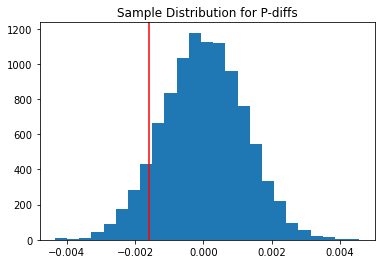

In [32]:
plt.hist(p_diffs, bins=25) #classic bell shape
plt.axvline(x= obs_diff, color='r')
plt.title('Sample Distribution for P-diffs');

Classic Bell shape

In [33]:
#np.array(p_diffs).mean()

**j.** What proportion of the **p_diffs** are greater than the actual difference observed in the `df2` data?

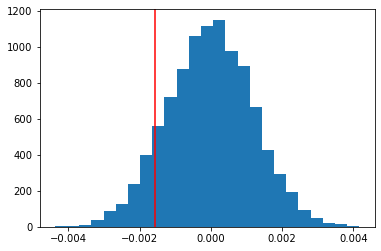

In [34]:
# null should be centered around 0 (assuming there is no difference between the 2 groups)
null_vals = np.random.normal(0, np.array(p_diffs).std(), np.array(p_diffs).shape[0])
plt.hist(null_vals, bins=25) 
plt.axvline(x= obs_diff, color='r');

In [35]:
#np.array(p_diffs).shape[0]

In [36]:
#proportion of the p_diffs are greater than obs_diff
(null_vals > obs_diff).mean()

0.899

**k.** Please explain in words what you have just computed in part **j** above.  
 - What is this value called in scientific studies?  
 - What does this value signify in terms of whether or not there is a difference between the new and old pages? *Hint*: Compare the value above with the "Type I error rate (0.05)". 

> The value we calculated is called the p-value

- Since the p-value [i.e. the probability of observing our statistic or a more extreme one in favor of our alternative, assuming the null is true] **0.9073** is greater than type-I error threshold - alpha (0.05) is greater than 0.05, then we fail to reject the null hypothesis in this case.



**l. Using Built-in Methods for Hypothesis Testing**<br>
We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. 

Fill in the statements below to calculate the:
- `convert_old`: number of conversions with the old_page
- `convert_new`: number of conversions with the new_page
- `n_old`: number of individuals who were shown the old_page
- `n_new`: number of individuals who were shown the new_page


In [37]:
df2.head(2)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0


In [38]:
import statsmodels.api as sm

# number of conversions with the old_page
convert_old = df2['user_id'][(df2.converted == 1) & (df2['landing_page'] == "old_page")].count()

# number of conversions with the new_page
convert_new = df2['user_id'][(df2.converted == 1) & (df2['landing_page'] == "new_page")].count()

# number of individuals who were shown the old_page
n_old = df2['user_id'][df2['landing_page'] == 'old_page'].count()

# number of individuals who received new_page
n_new = df2['user_id'][df2['landing_page'] == 'new_page'].count()

**m.** Now use `sm.stats.proportions_ztest()` to compute your test statistic and p-value.  [Here](https://www.statsmodels.org/stable/generated/statsmodels.stats.proportion.proportions_ztest.html) is a helpful link on using the built in.


---
### About the two-sample z-test
Recall that you have plotted a distribution `p_diffs` representing the
difference in the "converted" probability  $(p{'}_{new}-p{'}_{old})$  for your two simulated samples 10,000 times. 

Another way for comparing the mean of two independent and normal distribution is a **two-sample z-test**. You can perform the Z-test to calculate the Z_score, as shown in the equation below:

$$
Z_{score} = \frac{ (p{'}_{new}-p{'}_{old}) - (p_{new}  -  p_{old})}{ \sqrt{ \frac{\sigma^{2}_{new} }{n_{new}} + \frac{\sigma^{2}_{old} }{n_{old}}  } }
$$

where,
- $p{'}$ is the "converted" success rate in the sample
- $p_{new}$ and $p_{old}$ are the "converted" success rate for the two groups in the population. 
- $\sigma_{new}$ and $\sigma_{new}$ are the standard deviation for the two groups in the population. 
- $n_{new}$ and $n_{old}$ represent the size of the two groups or samples (it's same in our case)


>Z-test is performed when the sample size is large, and the population variance is known. The z-score represents the distance between the two "converted" success rates in terms of the standard error. 

Next step is to make a decision to reject or fail to reject the null hypothesis based on comparing these two values: 
- $Z_{score}$
- $Z_{\alpha}$ or $Z_{0.05}$, also known as critical value at 95% confidence interval.  $Z_{0.05}$ is 1.645 for one-tailed tests,  and 1.960 for two-tailed test. You can determine the $Z_{\alpha}$ from the z-table manually. 

Decide if your hypothesis is either a two-tailed, left-tailed, or right-tailed test. Accordingly, reject OR fail to reject the  null based on the comparison between $Z_{score}$ and $Z_{\alpha}$. We determine whether or not the $Z_{score}$ lies in the "rejection region" in the distribution. In other words, a "rejection region" is an interval where the null hypothesis is rejected iff the $Z_{score}$ lies in that region.

>Hint:<br>
For a right-tailed test, reject null if $Z_{score}$ > $Z_{\alpha}$. <br>
For a left-tailed test, reject null if $Z_{score}$ < $Z_{\alpha}$. 




Reference: 
- Example 9.1.2 on this [page](https://stats.libretexts.org/Bookshelves/Introductory_Statistics/Book%3A_Introductory_Statistics_(Shafer_and_Zhang)/09%3A_Two-Sample_Problems/9.01%3A_Comparison_of_Two_Population_Means-_Large_Independent_Samples), courtesy www.stats.libretexts.org


--------------
The syntax is: 
```bash
proportions_ztest(count_array, nobs_array, alternative='larger')
```
where, 
- `count_array` = represents the number of "converted" for each group
- `nobs_array` = represents the total number of observations (rows) in each group
- `alternative` = choose one of the values from `[‘two-sided’, ‘smaller’, ‘larger’]` depending upon two-tailed, left-tailed, or right-tailed respectively. 
>**Hint**: <br>
It's a two-tailed if you defined $H_1$ as $(p_{new} = p_{old})$. <br>
It's a left-tailed if you defined $H_1$ as $(p_{new} < p_{old})$. <br>
It's a right-tailed if you defined $H_1$ as $(p_{new} > p_{old})$. 

The built-in function above will return the z_score, p_value. 

In [39]:
import statsmodels.api as sm
# ToDo: Complete the sm.stats.proportions_ztest() method arguments
count = [convert_new, convert_old]
nobs = [n_old, n_new]
value = 0
z_score, p_value = sm.stats.proportions_ztest(count, nobs, value, alternative = 'larger')
print(z_score, p_value)

-1.2616957421858055 0.8964708551967226


**n.** What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?<br><br>

>**Tip**: Notice whether the p-value is similar to the one computed earlier. Accordingly, can you reject/fail to reject the null hypothesis? It is important to correctly interpret the test statistic and p-value.

Initial observations: 
1. p-value from the z-test (0.90) is almost the same as the one computed earlier **p-value = 0.91**
2. The z-score 𝑍𝑠𝑐𝑜𝑟𝑒 > 𝑍𝛼  so we fail to reject the null hypothesis

<a id='regression'></a>
### Part III - A regression approach

###  3.1 
In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 
**a.** Since each row in the `df2` data is either a conversion or no conversion, what type of regression should you be performing in this case?

Answer
> "conversion or no conversion" is a  0,1 type categorical variable, so we'll use logistic regression

**b.** The goal is to use **statsmodels** library to fit the regression model you specified in part **a.** above to see if there is a significant difference in conversion based on the page-type a customer receives. However, you first need to create the following two columns in the `df2` dataframe:
 1. `intercept` - It should be `1` in the entire column. 
 2. `ab_page` - It's a dummy variable column, having a value `1` when an individual receives the **treatment**, otherwise `0`.  

In [40]:
#Create ab_page column
#When a user recieves the treatment in our case, meaning they got the new landing page
df2[['ab_page', 'no_treatment']] = pd.get_dummies(df2['landing_page'])
df2.head(3)

,user_id,timestamp,group,landing_page,converted,ab_page,no_treatment
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0


In [41]:
#create intercept column
df2['intercept'] = 1

**c.** Use **statsmodels** to instantiate your regression model on the two columns you created in part (b). above, then fit the model to predict whether or not an individual converts. 


In [42]:
#instantiate the logistic regression model, we will not add no_treatment to our log reg model to ensure we're passing a gull rank matrix
logreg_mod1 = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])

#fit the model
results = logreg_mod1.fit()


Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


**d.** Provide the summary of your model below, and use it as necessary to answer the following questions.

In [43]:
#model summary
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212780.3502
Date:               2022-03-09 08:22 BIC:              212801.5095
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           1                LL-Null:          -1.0639e+05
Df Residuals:       290582           LLR p-value:      0.18988    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

**e.** What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br> Reference: https://www.machinelearningplus.com/statistics/what-is-p-value/

Answer
> The p-value associated with the ab_page is 0.190. The Null and alternative hypothesis in part II stated that the old page is as good as the new page if not better. The p-value for that sampling distribution was larger than 0.05 (alpha level) i.e. not significant at that alpha level so we fail to reject the null in part II. The hypothesis tests we did in part II was one sided (one-directional), the greater than or equal to sign gives it away. 

> In the regresion analysis, the hypothesis testing is done on the coefficients and it's 2-sided, we can check that there are 2 confidence intervals in the summary from the regression model. The null hypothesis done in the regression model is that the slope coefficient (beta) is zero vs alternative which states that the coeffienct is not zero i.e, is that the the predictor variable attached to that coefficient has statisticaly significant relationship with our predicted reponse. In other words, is that x-variable helpful in predicting our reponse or it's better to remove it from our model.

**f.** Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

Answer
> It's a good idea to consider other factors in our regression model. First it can help us determine if  there is influence of one or more predictor variables (independent variables) on the predicted (depedent variable). A problem of multiple regression that it may give the illusion of a predictor having an effect on the predicted value i.e. correlation vs causation, especially if we used the data incorrectly. Another issue might arise in MLR is that it makes the model more complex. 

**g. Adding countries**<br> 
Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. 

1. You will need to read in the **countries.csv** dataset and merge together your `df2` datasets on the appropriate rows. You call the resulting dataframe `df_merged`. [Here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html) are the docs for joining tables. 

2. Does it appear that country had an impact on conversion?  To answer this question, consider the three unique values, `['UK', 'US', 'CA']`, in the `country` column. Create dummy variables for these country columns. 

Provide the statistical output as well as a written response to answer this question.

In [44]:
# Read the countries.csv
countries = pd.read_csv('countries.csv')
countries.head(3), countries.country.value_counts()

(   user_id country
 0   834778      UK
 1   928468      US
 2   822059      UK,
 US    203619
 UK     72466
 CA     14499
 Name: country, dtype: int64)

In [45]:
df2.head(2)

,user_id,timestamp,group,landing_page,converted,ab_page,no_treatment,intercept
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0,1,1


In [46]:
# Join with the df2 dataframe
# setting index as user_id for both dataframes
df2 = df2.set_index('user_id').join(countries.set_index('user_id'), on='user_id', how='left')

In [47]:
# Create the necessary dummy variables
df3 = pd.get_dummies(df2['country'])
df3.head(5)

,CA,UK,US
user_id,,,
851104,0,0,1
804228,0,0,1
661590,0,0,1
853541,0,0,1
864975,0,0,1


In [48]:
#join the dummy variables to the main df2
df2 = df2.join(df3, on = 'user_id', how= 'left')

In [49]:
#instantiate the logistic regression model, US, will be the baseline
logreg_mod2 = sm.Logit(df2['converted'], df2[['intercept', 'ab_page', 'UK', 'CA']])

#fit the model
results2 = logreg_mod2.fit()

#model summary
results2.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Wed, 09 Mar 2022   Pseudo R-squ.:               2.323e-05
Time:                        08:22:05   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9893      0.009   -223.763      0.000      -2.007      -1.972
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
UK             0.0099      0.013      0.743      0.457      -0.016       0.036
CA            -0.0408      0.027     -1.516      0.130      -0.093       0.012
==============================================================================
"""

Answer
> The p-values for the cofficients associated with the new landing page and the countries, are greater than 0.05 thus we fail to reject the hypothesis stating that all these cofficients equal zero, i.e. they have no statistical significance in affecting the conversion rate

**h. Fit your model and obtain the results**<br> 
Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if are there significant effects on conversion.  **Create the necessary additional columns, and fit the new model.** 

In [50]:
# to check for an interactions between page and country, we'll create the following columns
df2['ab_us'] = df2['US'] * df2['ab_page']
df2['ab_uk'] = df2['UK'] * df2['ab_page']
df2['ab_ca'] = df2['CA'] * df2['ab_page']

In [51]:
# Fit your model, and summarize the results

#instantiate the log reg model, with US as the baseline, no need to create a new intercept, using ab_us as baseline
logreg_mod3 = sm.Logit(df2['converted'], df2[['intercept', 'ab_page', 'US', 'UK', 'ab_us', 'ab_uk']])
results3 = logreg_mod3.fit()
results3.summary2()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212782.6602
Date:               2022-03-09 08:22 BIC:              212846.1381
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           5                LL-Null:          -1.0639e+05
Df Residuals:       290578           LLR p-value:      0.19199    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0040    0.0364  -55.0077  0.0000  -2.0754  -1.9326
ab_page       -0.0674    0.0520   -1.2967  0.1947  -0.1694   0.0345
US             0.0175    0.0377    0.4652  0.6418  -0.0563   0.0914
UK             0.0118    0.0398    0.2957  0.7674  -0.0663   0.0899
ab_us          0.0469    0.0538    0.8718  0.3833  -0.0585   0.1523
ab_uk          0.0783    0.0568    1.3783  0.1681  -0.0330   0.1896
==================================================================

"""

In [52]:
coeffs = np.exp(results3.params)
coeffs

intercept    0.134794
ab_page      0.934776
US           1.017682
UK           1.011854
ab_us        1.048001
ab_uk        1.081428
dtype: float64

In [53]:
1/coeffs

intercept    7.418713
ab_page      1.069775
US           0.982625
UK           0.988285
ab_us        0.954198
ab_uk        0.924703
dtype: float64

**Conclusion**: The p-value associated with the new page and the interaction between the new page and countries all have p-values greater than 0.05, thus we fail to reject the null hypohesis stating that coefficient associated with the new page and countries is zero, i.e. there is no statistical significance on the conversion rate. 

In [54]:
#check experiment runtime
df2.timestamp.min(), df2.timestamp.max() # arroud 22 days

('2017-01-02 13:42:05.378582', '2017-01-24 13:41:54.460509')

### Final Conclusions and Possible limitations:

- Experiment was run for only 22 days, the duration of the experiment might have had an effect on our AB testing. We don't have enough information about the duration of the conversion cycle. It maybe yeild different results if the experiment would run for a shorter or longer times to account for behavioral changes based on time. Another issue to consider is the novetly affect when the treatment group first encountered the new landing page.

- I think it's a good idea to consider the revenue generation on the long run for the new langing page, or click thru rate in case of the new page, not just the conversion rate as it might not be the best metric.

- Given the costs associated with designing, coding and launching a new landing page, and given the very little effect it had on the conversation rate, it might be not practically significant, even if the AB testing results shows siginificant change in the conversion rate.

### More Analysis...More fun
- I want to check day of week as another predictor and check if there is any interaction associated with weekend/ weekday with the new page

In [55]:
#change timestamps into a new column date as datetime64 format
df2['dates'] = pd.to_datetime(df2.timestamp)

In [56]:
from datetime import datetime
#change dates into numbers to indicate weekdays
df2['dates'] = df2['dates'].dt.dayofweek

In [57]:
#seperate into 2 columns weekend and weekday
df2['weekend'] = np.where(df2.dates >= 5,'weekend','weekday')

In [58]:
#get dummies for weekends, and weekday (0,1)
df2[['weekend', 'weekday']] = pd.get_dummies(df2.weekend)

In [59]:
#instantiate the logistic regression model, the weekday will be the baseline
logreg_mod4 = sm.Logit(df2['converted'], df2[['intercept', 'ab_page', 'weekend']])

#fit the model
results4 = logreg_mod4.fit()

#model summary
results4.summary2()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212782.3478
Date:               2022-03-09 08:22 BIC:              212814.0868
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           2                LL-Null:          -1.0639e+05
Df Residuals:       290581           LLR p-value:      0.42297    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9883    0.0123  -161.5755  0.0000  -2.0124  -1.9642
ab_page      -0.0150    0.0114    -1.3108  0.1899  -0.0374   0.0074
weekend      -0.0006    0.0128    -0.0488  0.9610  -0.0257   0.0245
==================================================================

"""

-----
Let's check if there is any interaction between the page and the weekend to see if are there significant effects on conversion


In [60]:
#create necessary columns for interaction
df2['weekend_ab'] = df2.weekend * df2['ab_page']
df2['weekday_ab'] = df2.weekend * df2['ab_page']

In [61]:
#instantiate the logistic regression model, the weekday, weekday_ab will be the baselines
logreg_mod5= sm.Logit(df2['converted'], df2[['intercept', 'ab_page', 'weekend', 'weekend_ab']])

#fit the model
results5 = logreg_mod5.fit()

#model summary
results5.summary2()

Optimization terminated successfully.
         Current function value: 0.366114
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212781.6631
Date:               2022-03-09 08:22 BIC:              212823.9817
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           3                LL-Null:          -1.0639e+05
Df Residuals:       290580           LLR p-value:      0.22087    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9733    0.0153  -129.0175  0.0000  -2.0033  -1.9433
ab_page      -0.0455    0.0218    -2.0820  0.0373  -0.0883  -0.0027
weekend      -0.0214    0.0180    -1.1891  0.2344  -0.0567   0.0139
weekend_ab    0.0420    0.0256     1.6384  0.1013  -0.0082   0.0923
==================================================================

"""

The p-values for the cofficients are all above 0.05, thus we can conclude there is no statistical significance of the weekday/ weekend or their interaction on the conversion rate.

Resources:




## Final Check!

Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!


## Submission
You may either submit your notebook through the "SUBMIT PROJECT" button at the bottom of this workspace, or you may work from your local machine and submit on  the last page of this project lesson.  

1. Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).


2. Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.


3. Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [62]:
#from subprocess import call
#call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb' '--to html'])